In [39]:
import os
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from constants import SPATIAL, TEMPORAL, MORPHOLOGICAL, feature_names

In [2]:
pd.options.display.max_columns = 500

In [5]:
PATH = 'clusterData_no_light_14_03_22_Hz/0'

df = None
files = os.listdir(PATH)
for file in sorted(files):
    if df is None:
        df = pd.read_csv(PATH + '/' + file)
    else:
        temp = pd.read_csv(PATH + '/' + file)
        df = df.append(temp)

df = df[feature_names]

In [30]:
mod_d = {'spatial': SPATIAL[:-1], 'temporal': TEMPORAL[:-1], 'morphological': MORPHOLOGICAL[:-1]}

spatial_families = {'SPD': ['spatial_dispersion_count', 'spatial_dispersion_sd', 'spatial_dispersion_area'],
                  'time_lag': ['dep_red', 'dep_sd','fzc_red', 'fzc_sd', 'szc_red', 'szc_sd'],
                  'graph': ['dep_graph_avg_speed', 'dep_graph_slowest_path', 'dep_graph_fastest_path',
                           'fzc_graph_avg_speed', 'fzc_graph_slowest_path', 'fzc_graph_fastest_path',
                           'szc_graph_avg_speed', 'szc_graph_slowest_path', 'szc_graph_fastest_path']}

temporal_families = {'short': ['d_kl_start', 'unif_dist', 'rise_time'],
                     'long': ['d_kl_mid', 'jump'],
                     'general': ['firing_rate', 'psd_center', 'der_psd_center']}

morph_families = {'WF': ['trough2peak', 'peak2peak', 'fwhm', 'rise_coef'],
                  'first': ['max_speed'],
                  'second': ['break_measure', 'smile_cry']}

families_d = {'spatial': spatial_families, 'temporal': temporal_families, 'morphological': morph_families}

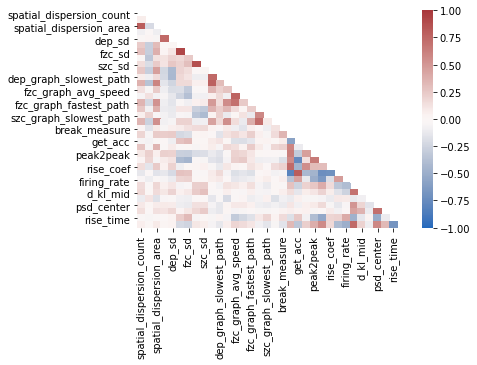

In [13]:
corr_mat = df.corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.yticks(rotation=30)
cmap = sns.color_palette("vlag", as_cmap=True)

_ = sns.heatmap(corr_mat, annot=False, fmt='.2f', mask=mask, vmin=-1, vmax=1, cmap=cmap,
                    annot_kws={"fontsize": 1})

plt.show()

In [50]:
for mod in mod_d:
    print(mod)
    
    mod_mat = corr_mat.loc[[feature_names[i] for i in mod_d[mod]],[feature_names[i] for i in mod_d[mod]]].abs()
    print(f'    mean (SEM) correlation: {mod_mat.to_numpy().mean(): .3f} ({stats.sem(mod_mat, axis=None): .3f})')
    print(f'    median (IQR) correlation: {np.median(mod_mat.to_numpy()): .3f} ({np.quantile(mod_mat, 0.25): .3f}, {np.quantile(mod_mat, 0.75): .3f})')
    print()
    
    for fam in families_d[mod]:
        fam_mat = mod_mat.loc[families_d[mod][fam], families_d[mod][fam]].to_numpy().flatten()
        print(f'    mean (SEM) correlation of {fam}: {fam_mat.mean(): .3f} ({stats.sem(fam_mat): .3f})')
        print(f'    median (IQR) correlation of {fam}: {np.median(fam_mat): .3f} ({np.quantile(fam_mat, 0.25): .3f}, {np.quantile(fam_mat, 0.75): .3f})')
    print()
        
    for i, fam1 in enumerate(families_d[mod]):
        for j, fam2 in enumerate(families_d[mod]):
            if i >= j:
                continue
            cross_mat = mod_mat.loc[families_d[mod][fam1], families_d[mod][fam2]].to_numpy().flatten()
            print(f'    mean (SEM) correlation of {fam1} X {fam2}: {cross_mat.mean(): .3f} ({stats.sem(cross_mat): .3f})')    
            print(f'    median (IQR) correlation of {fam1} X {fam2}: {np.median(cross_mat): .3f} ({np.quantile(cross_mat, 0.25): .3f}, {np.quantile(cross_mat, 0.75): .3f})')    
    print()
    print()

spatial
    mean (SEM) correlation:  0.267 ( 0.015)
    median (IQR) correlation:  0.184 ( 0.086,  0.342)

    mean (SEM) correlation of SPD:  0.574 ( 0.141)
    median (IQR) correlation of SPD:  0.808 ( 0.203,  1.000)
    mean (SEM) correlation of time_lag:  0.408 ( 0.064)
    median (IQR) correlation of time_lag:  0.224 ( 0.121,  0.879)
    mean (SEM) correlation of graph:  0.386 ( 0.034)
    median (IQR) correlation of graph:  0.280 ( 0.153,  0.581)

    mean (SEM) correlation of SPD X time_lag:  0.175 ( 0.030)
    median (IQR) correlation of SPD X time_lag:  0.175 ( 0.053,  0.287)
    mean (SEM) correlation of SPD X graph:  0.244 ( 0.032)
    median (IQR) correlation of SPD X graph:  0.236 ( 0.079,  0.358)
    mean (SEM) correlation of time_lag X graph:  0.148 ( 0.015)
    median (IQR) correlation of time_lag X graph:  0.114 ( 0.072,  0.203)


temporal
    mean (SEM) correlation:  0.405 ( 0.039)
    median (IQR) correlation:  0.381 ( 0.120,  0.604)

    mean (SEM) correlation of sh